Project: Bank Customer Churn Analysis 
Author: Divine Okoh 
Date: 6th August 2025
Goal: Analyze bank customer churn using demographic, financial and engagement data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [6]:
# Load sheets
customer_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name='Customer_Info')
account_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name='Account_Info')

# Previewing datasets
print("Customer Data:")
display(customer_df.head())

print("\nAccount Data:")
display(account_df.head())


Customer Data:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1



Account Data:


,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [10]:
# Merging on the common column
merged_df = pd.merge(customer_df, account_df, on='CustomerId', how='inner')

# Previewing our merged data
print("Merged Data:")
merged_df.head()

Merged Data:


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [12]:
# Checking for missing values
merged_df.isnull().sum()

# Checking data types
merged_df.dtypes

# Dropping duplicates if any
merged_df = merged_df.drop_duplicates()

Text(0.5, 1.0, 'Age Distribution')

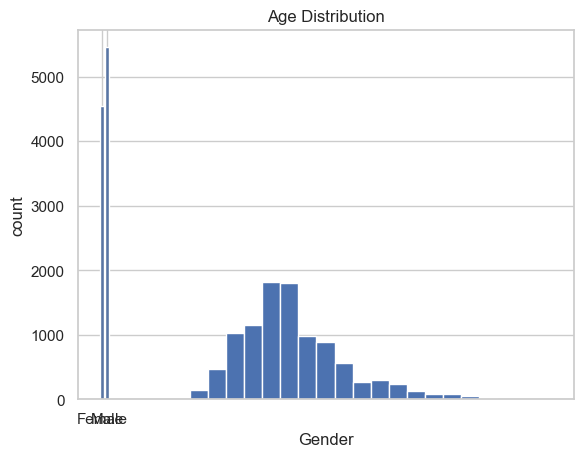

In [14]:
# Gender distribution
sns.countplot(data=merged_df, x='Gender')
plt.title('Gender Distribution')

# Age distribution
merged_df['Age'].hist(bins=20)
plt.title('Age Distribution')

Text(0.5, 1.0, 'Balance by Churn Status')

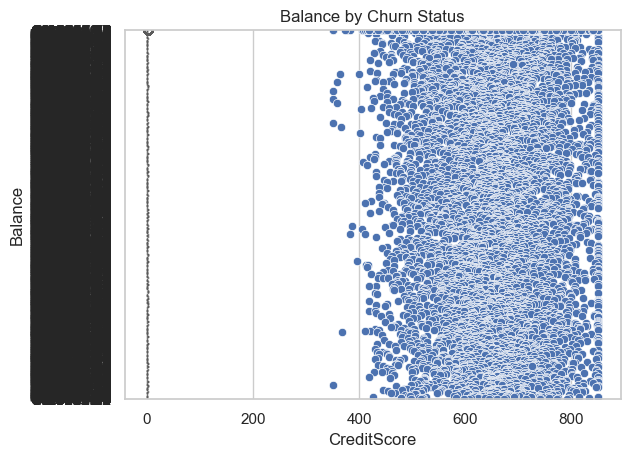

In [16]:
#Financial Performance
# Credit score vs balance
sns.scatterplot(data=merged_df, x='CreditScore', y='Balance')

# Compare average balance of churned vs retained
sns.boxplot(data=merged_df, x='Exited', y='Balance')
plt.title('Balance by Churn Status')

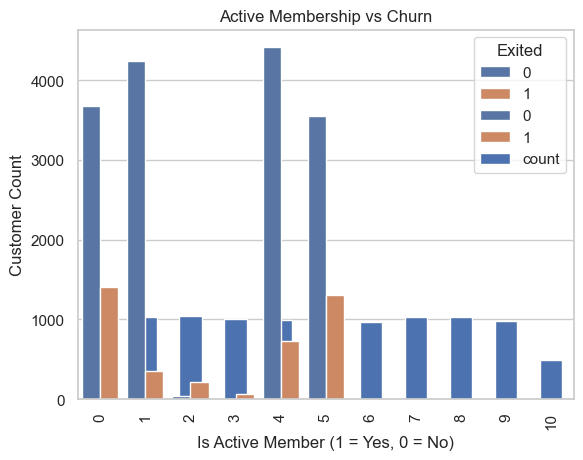

In [30]:
#Engagement Patterns 
# Tenure distribution
merged_df['Tenure_y'].value_counts().sort_index().plot(kind='bar')
plt.title('Customer Tenure Distribution')

# Products vs churn
sns.countplot(data=merged_df, x='NumOfProducts', hue='Exited')
plt.title('Number of Products vs Churn')

# IsActiveMember vs Churn
sns.countplot(data=merged_df, x='IsActiveMember', hue='Exited')
plt.title('Active Membership vs Churn')
plt.xlabel('Is Active Member (1 = Yes, 0 = No)')
plt.ylabel('Customer Count')
plt.show()

Churn Rate: 20.37%


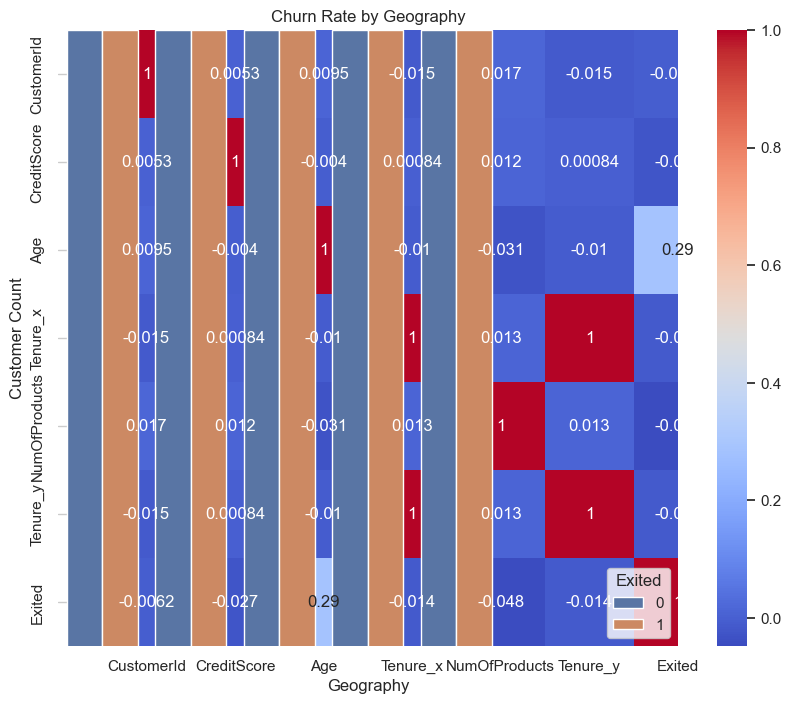

In [26]:
#Churn Analysis 
# Churn Rate
churn_rate = merged_df['Exited'].mean()
print(f"Churn Rate: {churn_rate:.2%}")

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

# Churn by Geography
sns.countplot(data=merged_df, x='Geography', hue='Exited')
plt.title('Churn Rate by Geography')
plt.xlabel('Geography')
plt.ylabel('Customer Count')
plt.show()